In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/TitanicDataset.csv', usecols=['Survived', 'PassengerId','Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked'])
df.sample(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
218,219,1,1,female,32.0,0,0,76.2917,C
620,621,0,3,male,27.0,1,0,14.4542,C
320,321,0,3,male,22.0,0,0,7.2500,S
332,333,0,1,male,38.0,0,1,153.4625,S
233,234,1,3,female,5.0,4,2,31.3875,S
125,126,1,3,male,12.0,1,0,11.2417,C


# New Section

In [ ]:
df.var(numeric_only=True)

,0
PassengerId,66231.000000
Survived,0.236772
Pclass,0.699015
Age,211.019125
SibSp,1.216043
Parch,0.649728
Fare,2469.436846


In [ ]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df['family']= df['Parch'] + df['SibSp']

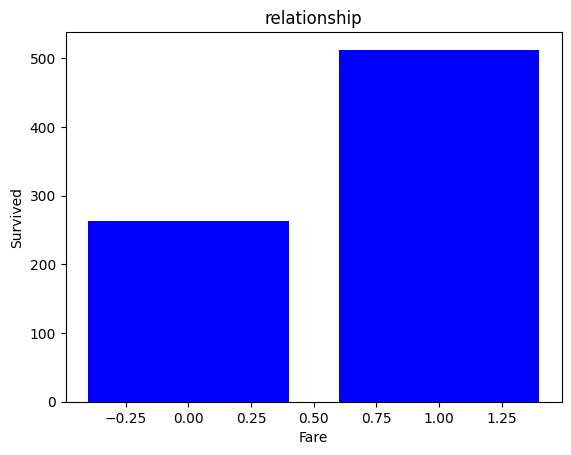

In [ ]:
y= df['Fare']
x= df['Survived']
plt.bar(x,y, color='blue')
plt.title("relationship")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.savefig("figure1.png")

In [ ]:
sur_count= df['Survived'].value_counts()

In [ ]:
sur_count

,count
Survived,
0,549
1,342


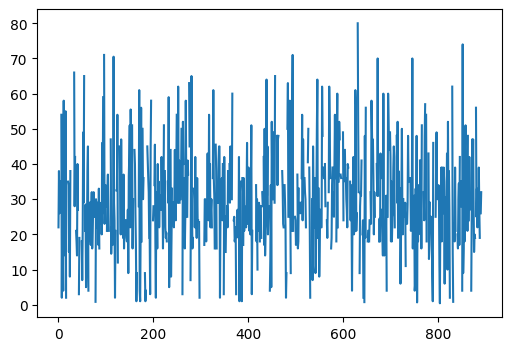

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(df['Age'])
plt.savefig("figure2.png")

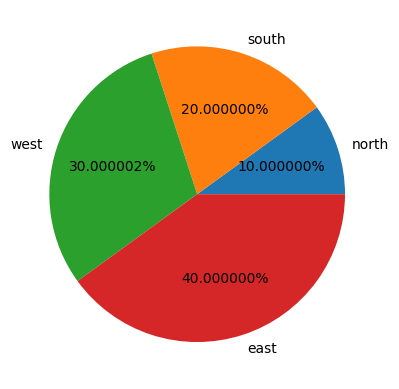

In [ ]:
regions=['north', 'south', 'west', 'east']
revenue=[1000,2000,3000,4000]
plt.pie(revenue, labels=regions, autopct='%1f%%')
plt.savefig("figure3.png")

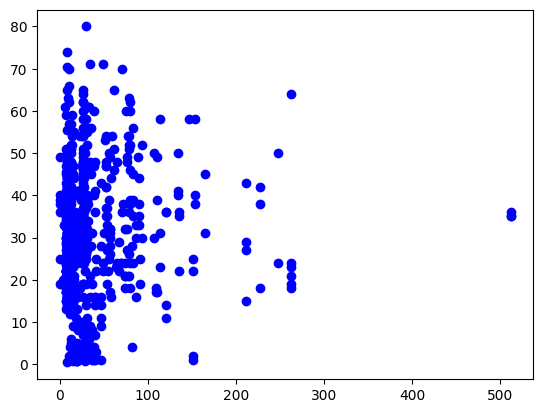

In [ ]:
plt.scatter(df['Fare'], df['Age'], color='blue', marker='o')
plt.savefig("figure4.png")

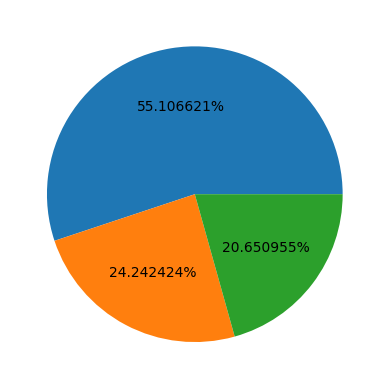

In [ ]:
z=df['Pclass'].value_counts()
z
plt.pie(z, autopct= '%1f%%')
plt.savefig("figure5.png")

/tmp/ipython-input-1598864671.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], label='age', hist='False')


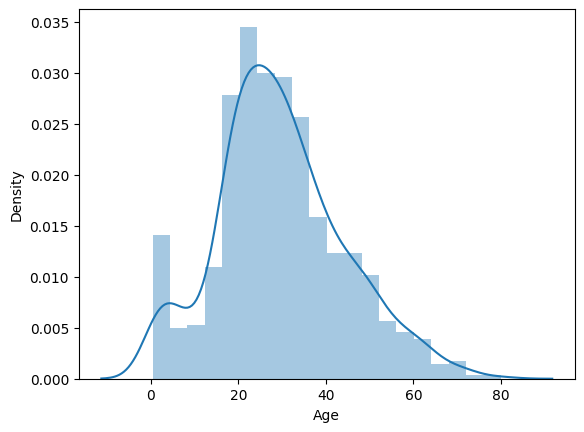

In [ ]:
sns.distplot(df['Age'], label='age', hist='False')
plt.savefig("figure6.png")

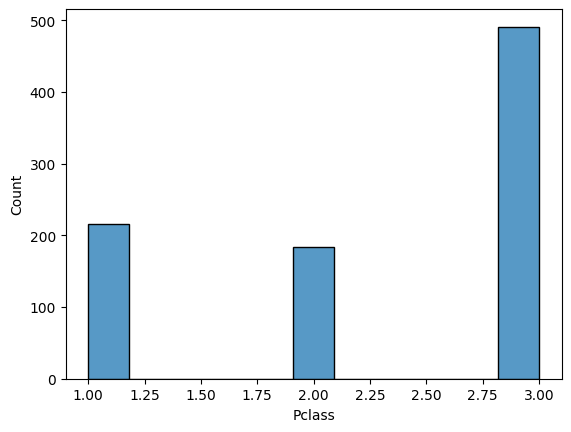

In [ ]:
sns.histplot(df['Pclass'])
plt.savefig("figure7.png")

In [ ]:
pip install fpdf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.7/245.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
# @title
from fpdf import FPDF

title='Project Report On Titanic Data Set'
class PDF(FPDF):






    def header(self):



        # font
        self.set_font('helvetica', 'BIU', 25)
        # Calculate width of title and position
        title_w = self.get_string_width(title) + 6
        doc_w = self.w
        self.set_x((doc_w - title_w) / 2)
        # colors of frame, background, and text
        self.set_draw_color(0, 80, 180) # border = blue
        self.set_fill_color(230, 230, 0) # background = yellow
        self.set_text_color(220, 50, 50) # text = red
        # Thickness of frame (border)
        self.set_line_width(1)
        # Title
        self.cell(title_w, 10, title, border=1, ln=1, align='C', fill=1)
        # Line break
        self.ln(10)

    # Page footer
    def footer(self):
        # Set position of the footer
        self.set_y(-15)
        # set font
        self.set_font('helvetica', 'I', 8)
        # Set font color grey
        self.set_text_color(169,169,169)
        # Page number
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

    # Adding chapter title to start of each chapter
    def chapter_title(self, ch_num, ch_title):
        # set font
        self.set_font('helvetica', '', 18)
        # background color
        self.set_fill_color(200, 220, 255)
        # Chapter title
        chapter_title = f'Chapter {ch_num} : {ch_title}'
        self.cell(0, 5,chapter_title, ln=1, fill=1, align='C')
        # line break
        self.ln()

    # Chapter content
    def chapter_body(self, name):
        # read text file
        with open(name, 'rb') as fh:
            txt = fh.read().decode('latin-1')
        # set font
        self.set_font('times', '', 12)
        # insert text
        self.multi_cell(0, 5, txt)
        # line break
        self.ln()


    def print_chapter(self, ch_num, ch_title, name):
        for i in range(1, 4):
          self.ln(38)
        self.chapter_title(ch_num, ch_title)
        self.chapter_body(name)

# Create a PDF object
pdf = PDF('P', 'mm', 'Letter')

# get total page numbers
pdf.alias_nb_pages()

# Set auto page break
pdf.set_auto_page_break(auto = True, margin = 15)

# Add Page
pdf.add_page()
pdf.image('titanic.jpg', 35, 25, 150)
pdf.link


pdf.print_chapter(0, 'Introduction of Titanic Incident', 'Intro.txt')


pdf.add_page()
pdf.image('figure1.png', 28, 20, 150)
pdf.print_chapter(1, 'Variation in the Age of passengers', 'fig2.txt')

pdf.add_page()
pdf.image('figure2.png', 28, 20, 150)
pdf.print_chapter(2, 'Relationship between Fare and Survival', 'fig2.txt')

pdf.add_page()
pdf.image('figure3.png', 28, 20, 150)
pdf.print_chapter(3, 'Distribution of Titanic passengers based on their port of embarkation', 'fig3.txt')

pdf.add_page()
pdf.image('figure4.png', 28, 20, 150)
pdf.print_chapter(4, 'Scatter Plot of Fare vs. Age', 'fig4.txt')

pdf.add_page()
pdf.image('figure5.png', 28, 20, 150)
pdf.print_chapter(5, 'Proportion of Passengers by Travel Class', 'fig5.txt')

pdf.add_page()
pdf.image('figure6.png', 28, 20, 150)
pdf.print_chapter(6, 'Age Distribution of Passengers', 'fig6.txt')

pdf.add_page()
pdf.image('figure7.png', 28, 20, 150)
pdf.print_chapter(7, ' Passenger Count by Class', 'fig7.txt')

pdf.output('Projectreport.pdf')

/tmp/ipython-input-3184350010.py:29: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(title_w, 10, title, border=1, ln=1, align='C', fill=1)
/tmp/ipython-input-3184350010.py:52: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 5,chapter_title, ln=1, fill=1, align='C')
